# Library

In [2]:
import pandas as pd
import os

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats
import xport

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
import warnings
warnings.filterwarnings('ignore') 


from pandas.plotting import scatter_matrix

from sklearn.metrics import average_precision_score

C:\Users\zhezh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\

# Import data

In [3]:

# function:  rename_chosen_features(xpt_file,old_names,new_names,csv_file)
# purpose:   rename the chosen features in the XPT file
# input:     xpt_file: the converted dataframe from XPT file
#            old_names: a list of strings - strings are code names on NHANES 
#            new_names: a list of strings 
#            csv_file: name 
# output:    a dataframe with renamed chosen features  

def rename_chosen_features(xpt_file,old_names,new_names,csv_file):
    df = xpt_file[old_names]        
    df.columns = new_names                
    # xpt_file.to_csv(csv_file, header=False) # if needs to get a csv file from the original xpt file
    return df

In [4]:
os.chdir('C:/Users/zhezh/')


 
DIQ_xpt_file = pd.read_sas('DIQ_I1516.XPT')
DIQ_cvs_file = 'Diabetes1516.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010'] 
DIQ_new_names = ['ID','diabetes']
df0_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_I1516.XPT')
DEMO_cvs_file = 'Demographic1516.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df0_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_I1516.XPT')
GLU_cvs_file = 'FastingGlucose1516.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df0_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_I1516.XPT')
INS_cvs_file = 'Insulin1516.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df0_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)


## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_I1516.XPT')
ALQ_cvs_file = 'AlcoholUse1516.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df0_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_I1516.XPT')
TRIGLY_cvs_file = 'Cholesterol1516.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df0_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_I1516.XPT')
HDL_cvs_file = 'HDL1516.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df0_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_I1516.XPT')
BPX_cvs_file = 'BloodPressure1516.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df0_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_I1516.XPT')
BMX_cvs_file = 'BMI1516.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df0_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_I1516.XPT')
DSQTOT_cvs_file = 'Sugar1516.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df0_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)


DIQ_xpt_file = pd.read_sas('DIQ_H1314.XPT')
DIQ_cvs_file = 'Diabetes1314.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010'] 
DIQ_new_names = ['ID','diabetes']
df1_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_H1314.XPT')
DEMO_cvs_file = 'Demographic1314.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df1_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_H1314.XPT')
GLU_cvs_file = 'FastingGlucose1314.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df1_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)



## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_H1314.XPT')
ALQ_cvs_file = 'AlcoholUse1314.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df1_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_H1314.XPT')
INS_cvs_file = 'Insulin1314.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df1_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_H1314.XPT')
TRIGLY_cvs_file = 'Cholesterol1314.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df1_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_H1314.XPT')
HDL_cvs_file = 'HDL1314.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df1_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_H1314.XPT')
BPX_cvs_file = 'BloodPressure1314.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df1_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_H1314.XPT')
BMX_cvs_file = 'BMI1314.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df1_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_H1314.XPT')
DSQTOT_cvs_file = 'Sugar1314.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df1_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)


# Merge dataframes

In [5]:
df0 = pd.merge(df0_ALQ, df0_BMX, how ="inner", on = "ID")
df0 = pd.merge(df0, df0_BPX, how = "inner", on ="ID")
df0 = pd.merge(df0,df0_DEMO, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DIQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DSQTOT, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_GLU, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_TRIGLY, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_INS, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_HDL, how = 'inner', on = "ID")


df1 = pd.merge(df1_ALQ, df1_BMX, how ="inner", on = "ID")
df1 = pd.merge(df1, df1_BPX, how = "inner", on ="ID")
df1 = pd.merge(df1,df1_DEMO, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DIQ, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DSQTOT, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_GLU, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_TRIGLY, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_INS, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_HDL, how = 'inner', on = "ID")

# Set Index

In [6]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')]


# set SEQN to index of the df0
df1.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df1 = df1[~df1.index.duplicated(keep='first')]

In [7]:

df0 = df0.reindex(sorted(df0.columns), axis=1)

df1 = df1.reindex(sorted(df1.columns), axis=1)

final_df = pd.concat([df1, df0], axis =0)
final_df.info()

df = final_df.copy(deep=True)
df.head()
print(df)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5569 entries, 73559.0 to 93697.0
Data columns (total 17 columns):
BMI                5502 non-null float64
HDL                5265 non-null float64
LDL                5003 non-null float64
age                5569 non-null float64
alc_days_year      4165 non-null float64
diaBP1             5185 non-null float64
diaBP2             5346 non-null float64
diaBP3             5342 non-null float64
diabetes           5569 non-null float64
fasting_glucose    5298 non-null float64
gender             5569 non-null float64
insulin            5195 non-null float64
race               5569 non-null float64
sugar              608 non-null float64
sysBP1             5185 non-null float64
sysBP2             5346 non-null float64
sysBP3             5342 non-null float64
dtypes: float64(17)
memory usage: 783.1 KB
          BMI   HDL    LDL   age  alc_days_year  diaBP1  diaBP2  diaBP3  \
ID                                                                  

# Data Pre-Processing

In [8]:
# function:  clean_epsilon(cell)
# purpose:   in the orginal files, zeros are represented by a small value (10^-79), convert them to actual zeros
# input:     a dataframe that with (10^-79) as zeroes 
# output:    a dataframe with actual zeroes 

def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

df = df.applymap(clean_epsilon)

In [9]:
# Obtain average systolic and diastolic pressure values from the multiple measurements
df['sysBP'] = (df['sysBP1']+df['sysBP2']+df['sysBP3'])/3
df['diaBP'] = (df['diaBP1']+df['diaBP2']+df['diaBP3'])/3
df = df.drop(['sysBP1','diaBP1','sysBP2','diaBP2','sysBP3','diaBP3'], axis=1)
df.head()

,BMI,HDL,LDL,age,alc_days_year,diabetes,fasting_glucose,gender,insulin,race,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,
73559.0,28.9,1.55,1.448,72.0,0.0,1.0,10.713,1.0,34.98,3.0,NaN,142.000000,82.000000
73561.0,19.7,2.20,2.612,73.0,0.0,2.0,5.940,2.0,36.72,3.0,NaN,137.333333,86.666667
73564.0,35.7,1.50,2.508,61.0,2.0,2.0,6.106,2.0,89.46,3.0,0.33,122.666667,80.666667
73568.0,20.3,2.48,1.733,26.0,2.0,2.0,4.940,2.0,23.10,3.0,NaN,104.666667,62.666667
73574.0,22.8,1.37,1.940,33.0,NaN,2.0,4.663,2.0,36.30,6.0,NaN,121.333333,62.000000


In [10]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    


def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df


In [11]:
#Function to obtain the count of missing values
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())

### Functions to Visualize Missing values

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5569 entries, 73559.0 to 93697.0
Data columns (total 13 columns):
BMI                5502 non-null float64
HDL                5265 non-null float64
LDL                5003 non-null float64
age                5569 non-null float64
alc_days_year      4165 non-null float64
diabetes           5569 non-null float64
fasting_glucose    5298 non-null float64
gender             5569 non-null float64
insulin            5195 non-null float64
race               5569 non-null float64
sugar              608 non-null float64
sysBP              5092 non-null float64
diaBP              5092 non-null float64
dtypes: float64(13)
memory usage: 609.1 KB


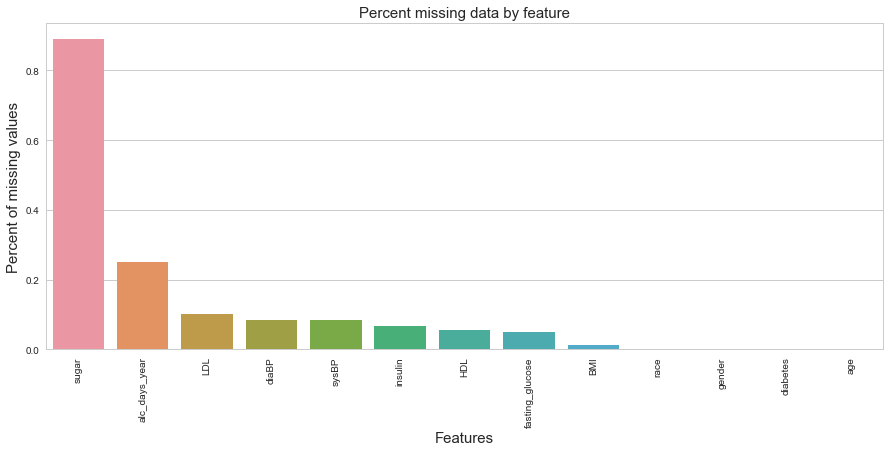

In [12]:
# purpose:   get the ratio of (missing values)/(total entries) for ***one feature***  
# input:     df: dataframe that contains the feature you want to check for NaN ratio
#            feature: the name of the feature - string           
# output:    NaN ratio of the feature, and instructions on what to do next 

def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')

# features = df.columns.values.tolist()
# for feature in features:
#     get_NaN_ratio(df,feature)
#     print('----------------------')


def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    
plot_NaN_percentage_for_all(df)
df.info()

### Outliers

In [13]:
# Function to Detection Outliers

def find_anomalies(data, a):
    anomalies_a = []
    patient_a = []

    # Set upper and lower limit to 3 standard deviation 
    random_data_std = data.std()
    random_data_mean = data.mean()
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for i in data:
        if i > upper_limit or i < lower_limit:
            anomalies_a.append(i)
            index_value_i = (data==i).index
            patient_a.append(index_value_i)
    return anomalies_a
    #return patient_a

print(df.columns)
   
   




Index(['BMI', 'HDL', 'LDL', 'age', 'alc_days_year', 'diabetes',
       'fasting_glucose', 'gender', 'insulin', 'race', 'sugar', 'sysBP',
       'diaBP'],
      dtype='object')


68


count    5434.000000
mean       28.694921
std         6.512621
min        15.100000
25%        23.900000
50%        27.800000
75%        32.300000
max        50.500000
Name: BMI, dtype: float64

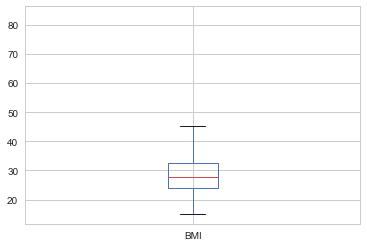

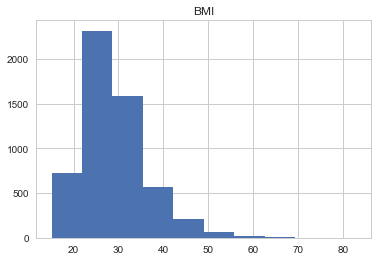

In [14]:
print(len(find_anomalies(df["BMI"],1)))
boxplot = df.boxplot(column=['BMI'])
hist = df.hist(column=['BMI'])
for i in find_anomalies(df["BMI"],1):
    df = df[df.BMI != i]
df["BMI"].describe()

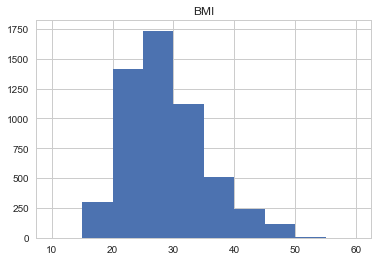

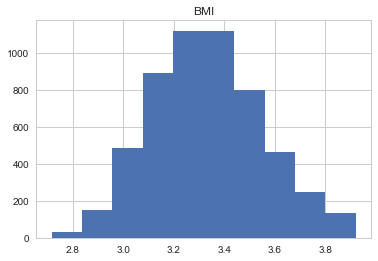

In [15]:
hist_before = df.hist(column=['BMI'], range=[10, 60])
df["BMI"] = np.log(df["BMI"])
hist_after = df.hist(column=['BMI'])


53


count    5115.000000
mean        1.413851
std         0.439148
min         0.160000
25%         1.110000
50%         1.340000
75%         1.660000
max         5.840000
Name: HDL, dtype: float64

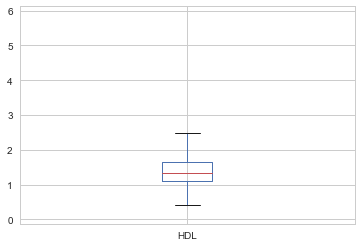

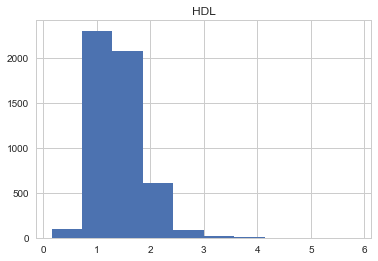

In [16]:
print(len(find_anomalies(df["HDL"],2)))
boxplot = df.boxplot(column=['HDL'])
hist = df.hist(column=['HDL'])
for i in find_anomalies(df["HDL"],2):
    df = df[df.LDL != i]
df["HDL"].describe()

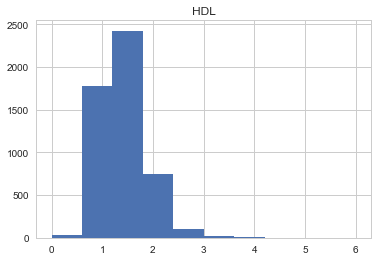

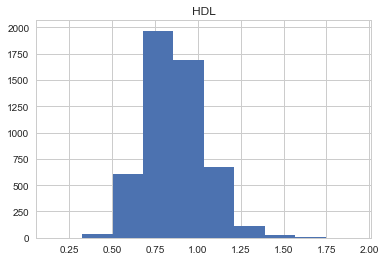

In [17]:
hist_before = df.hist(column=['HDL'], range=[0, 6])
df["HDL"] = np.log(df["HDL"]+1)
hist_after = df.hist(column=['HDL'])



32


count    4821.000000
mean        2.829250
std         0.879974
min         0.362000
25%         2.198000
50%         2.767000
75%         3.388000
max         5.612000
Name: LDL, dtype: float64

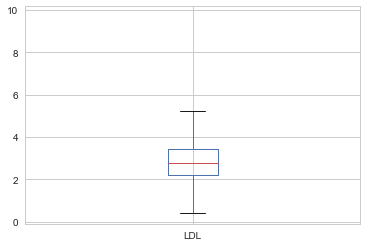

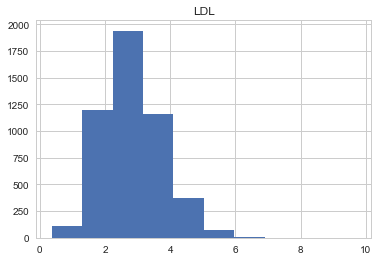

In [18]:
print(len(find_anomalies(df["LDL"],3)))
boxplot = df.boxplot(column=['LDL'])
hist = df.hist(column=['LDL'])
for i in find_anomalies(df["LDL"],3):
    df = df[df.LDL != i]
df["LDL"].describe()

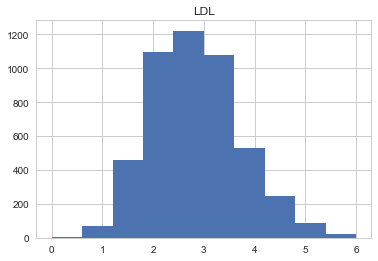

In [19]:
hist_before = df.hist(column=['LDL'], range = [0,6])


120


count    4994.000000
mean        5.829674
std         1.202900
min         1.170000
25%         5.162000
50%         5.550000
75%         6.100000
max        12.268000
Name: fasting_glucose, dtype: float64

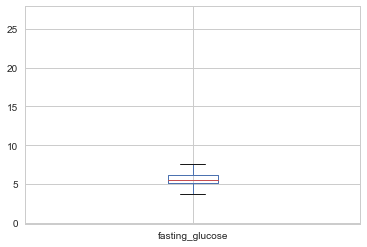

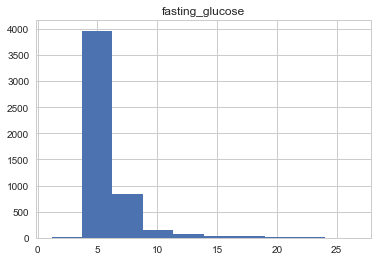

In [20]:
print(len(find_anomalies(df["fasting_glucose"],4)))
boxplot = df.boxplot(column=['fasting_glucose'])
hist = df.hist(column=['fasting_glucose'])
for i in find_anomalies(df["fasting_glucose"],4):
    df = df[df.fasting_glucose != i]
df["fasting_glucose"].describe()

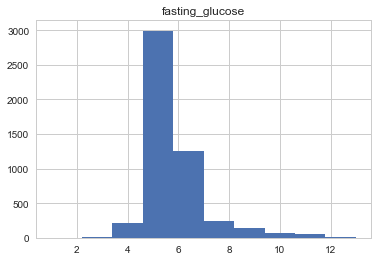

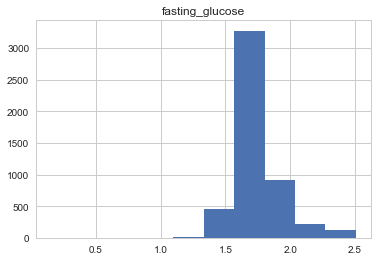

In [21]:
hist_before = df.hist(column=['fasting_glucose'], range = [1,13])
df["fasting_glucose"] = np.log(df["fasting_glucose"])
hist_after = df.hist(column=['fasting_glucose'])

56


count    4847.000000
mean       71.626420
std        57.997836
min         0.840000
25%        34.800000
50%        54.780000
75%        87.120000
max       420.540000
Name: insulin, dtype: float64

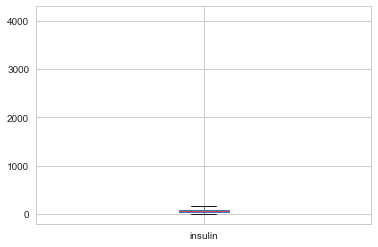

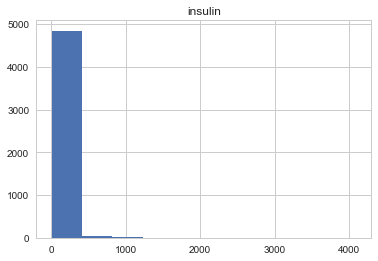

In [22]:
print(len(find_anomalies(df["insulin"],5)))
boxplot = df.boxplot(column=['insulin'])
hist = df.hist(column=['insulin'])
for i in find_anomalies(df["insulin"],5):
    df = df[df.insulin != i]
df["insulin"].describe()

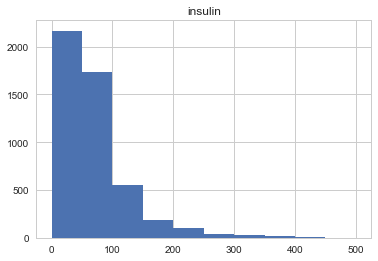

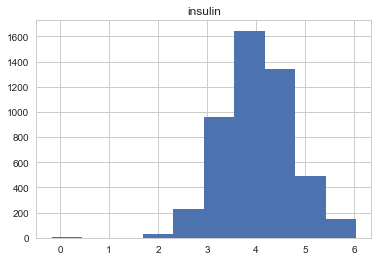

In [23]:
hist_before = df.hist(column=['insulin'], range=[0, 500])
df["insulin"] = np.log(df["insulin"])
hist_after = df.hist(column=['insulin'])

15


count    549.000000
mean       1.358597
std        1.662584
min        0.010000
25%        0.110000
50%        0.670000
75%        2.000000
max        8.100000
Name: sugar, dtype: float64

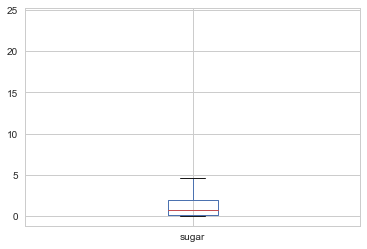

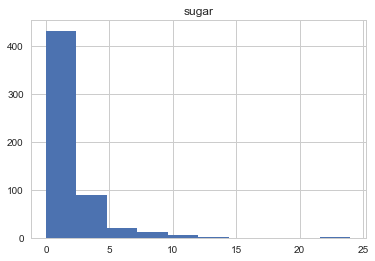

In [24]:
print(len(find_anomalies(df["sugar"],6)))
boxplot = df.boxplot(column=['sugar'])
hist = df.hist(column=['sugar'])
for i in find_anomalies(df["sugar"],6):
    df = df[df.sugar != i]
df["sugar"].describe()

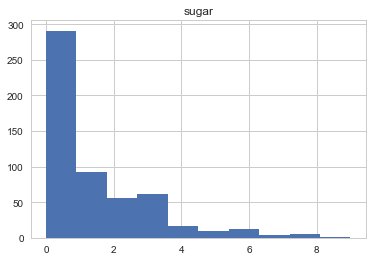

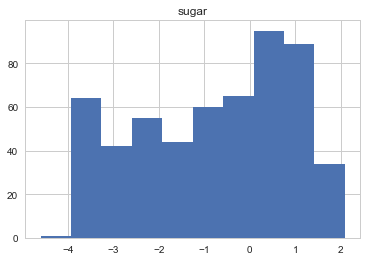

In [25]:
hist_before = df.hist(column=['sugar'], range=[0, 9])
df["sugar"] = np.log(df["sugar"])
hist_after = df.hist(column=['sugar'])

61


count    4691.000000
mean      122.039650
std        16.350069
min        70.666667
25%       110.666667
50%       119.333333
75%       131.333333
max       176.000000
Name: sysBP, dtype: float64

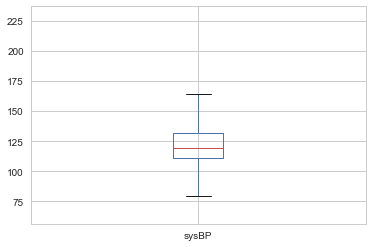

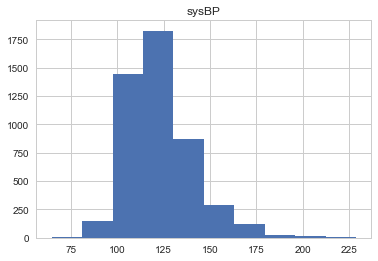

In [26]:
print(len(find_anomalies(df["sysBP"],7)))
boxplot = df.boxplot(column=['sysBP'])
hist = df.hist(column=['sysBP'])
for i in find_anomalies(df["sysBP"],7):
    df = df[df.sysBP != i]
df["sysBP"].describe()

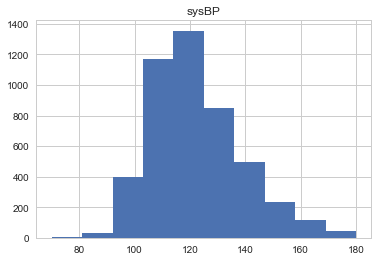

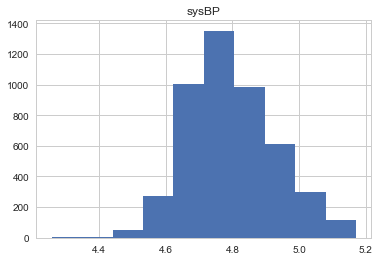

In [27]:
hist_before = df.hist(column=['sysBP'], range=[70, 180])
df["sysBP"] = np.log(df["sysBP"])
hist_after = df.hist(column=['sysBP'])

52


count    4639.000000
mean       68.626141
std        10.947227
min        32.000000
25%        61.333333
50%        68.666667
75%        75.333333
max       104.666667
Name: diaBP, dtype: float64

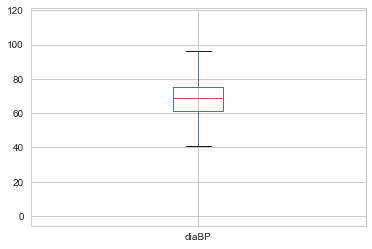

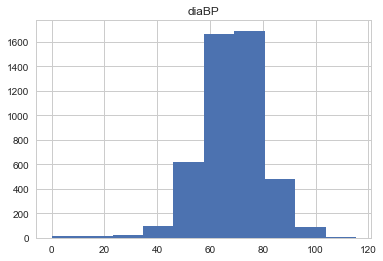

In [28]:
print(len(find_anomalies(df["diaBP"],8)))
boxplot = df.boxplot(column=['diaBP'])
hist = df.hist(column=['diaBP'])
for i in find_anomalies(df["diaBP"],8):
    df = df[df.diaBP != i]
df["diaBP"].describe()

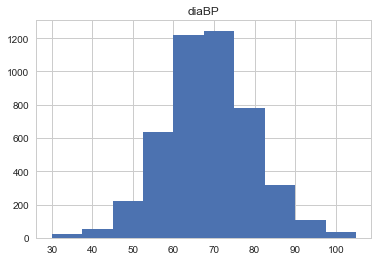

In [29]:
hist_before = df.hist(column=['diaBP'], range=[30, 105])


### Imputation of Missing values

In [30]:
# purpose:   Plot histograms showing the distribution of a feature before and after filling NaN
#            to see the change in distribution. This can tell you if the filling method is 
#            correct or not.
# input:     feature0: str0
#            feature: str
#            title of the plot

def plot_before_after(before,after,feature):
    fig, ax = plt.subplots()
    ax.hist(after,alpha=0.5,color='red')
    ax.hist(before)
    ax.legend(['after','before'])
    plt.title('Before vs. After(no NaN):'+feature)
    plt.ylabel('Frequency')

def plot_feature(feature):
    plt.figure()
    df[feature].hist()
    plt.title(feature)
    plt.ylabel('Frequency')

In [31]:
# function:  fill_NaN(df, feature, fill_type)
# purpose:   fill the missing values in ***one column/feature*** in the given df. 
# input:     df: the df containing the target column to be filled
#            feature: the column whose NaN's are dealt with
#            fill_type: choose among -> 'mean', 'mode', 'zero' 
#                       mean: if the feature is continuous without outliers - normal distribution
#                       median: if the feature is continuous with outliers - skewed distribution
#                       mode: if the feature is categorical
# output:    a df whose target column is filled (no more NaN in that col)

def fill_NaN(df, feature, fill_type):    
    before_filling = df[feature].dropna().copy(deep=True)
    if fill_type == 'mean':
        after_filling = df[feature].fillna(df[feature].dropna().mean())
    elif fill_type == 'mode':
        after_filling = df[feature].fillna(df[feature].dropna().mode().iloc[0])
    elif fill_type == 'std':
        after_filling = fill_NaN_std(df, feature)
#     elif fill_type == 'median':
#         after_filling = df[feature].fillna(df[feature].dropna().median())
    else:
        # fill type == 'zero' (new category)
        # set missing values as another category 
        # cannot set this new cat as 0 since there could be 0 after applying clean_epsilon function  
        # need to get a unique number representing NaN as a new category 
        new_type = 0
        after_filling = df[feature].fillna(new_type)   
    df[feature] = after_filling
    plot_before_after(before_filling, after_filling, feature)
    return df


def fill_NaN_std(df,feature):
    feature_avg = df[feature].mean()
    feature_std = df[feature].std()
    feature_null_count = df[feature].isnull().sum()
    feature_null_random_list = np.random.randint(feature_avg - feature_std, feature_avg + feature_std, size=feature_null_count)
    df[feature][np.isnan(df[feature])] = feature_null_random_list
    after_filling = df[feature].astype(int)
    return after_filling




In [32]:
# function:  predict_NaN_with_ML(df,x,y,data_type,model)
# purpose:   predict the values of NaN and fill these predicted values back into the dataframe
# input:     df: the dataframe containing the features used for prediction and target y(target feature)
#            x: a list of strings - features used for prediction - no NAN in all x's
#            y: a string - target feature
#            data_type: a string ->'categorical','numerical'
#            
# process: CV was used to set the hyperparamters ; and the model with a higher accuracy was chosen to impute the missing data


def predict_NaN_with_ML(df,x,y,data_type):
    before_filling = df[y].dropna().copy(deep=True)
    # build model using valid entries  
    valid_entries = df[df[y].notnull()]                # rows where y is not NaN (valid entries)
    print(valid_entries)
    valid_entries_x = valid_entries[x]                 # all x's for valid rows (x's are not NaN)
    print(valid_entries_x)
    valid_entries_y = valid_entries[y]                 # y for valid rows (y's are not NaN) 
    print(valid_entries_y)
    valid_entries_x = valid_entries_x.astype(float)    # change data type to float
    valid_entries_y = valid_entries_y.astype(float)
    
        
    if data_type == 'categorical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestClassifier()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )


        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

            
       
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsClassifier(n_neighbors=k)
            print("kNN provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)

                
    elif data_type == 'numerical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )

        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")
        
        
        
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestRegressor(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsRegressor(n_neighbors=k)
            print("kNN provides better accuracy")
            categorial = ['12drinksayear','5drinksaday','5drinks2hours','gender','race']
            numerical = ['BMI','LDL','age','fasting_glucose','sysBP','diaBP','sugar']
            for i in x:
                if i in numerical:
                    valid_entries_x['i'] = preprocessing.scale(valid_entries_x['i'])
   
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
    

In [33]:
#Drop the entire patient entry if that entry contains more than 6 NaN features out of 16 features (keep entries with more than 10 non-NaN values)
before = len(df.index)
df.dropna(thresh = 10,inplace = True)
after = len(df.index)
print(before-after,'patient entries are dropped since they contain more than 6 NaN variables')

439 patient entries are dropped since they contain more than 6 NaN variables


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 4640 entries, 73559.0 to 93697.0
Data columns (total 13 columns):
BMI                4607 non-null float64
HDL                4639 non-null float64
LDL                4433 non-null float64
age                4640 non-null float64
alc_days_year      3586 non-null float64
diabetes           4640 non-null float64
fasting_glucose    4634 non-null float64
gender             4640 non-null float64
insulin            4585 non-null float64
race               4640 non-null float64
sugar              511 non-null float64
sysBP              4380 non-null float64
diaBP              4380 non-null float64
dtypes: float64(13)
memory usage: 507.5 KB


### Adding dummy variables to indicate missing value in a given row for each feature

In [35]:
df.index = range(len(df))
for x in ['BMI', 'fasting_glucose', 'gender', 'LDL','HDL','insulin','age', 'race', 'sugar', 'sysBP', 'diaBP','alc_days_year']:
    dummy=pd.get_dummies(df[x],dummy_na=True)
    dummy.columns=dummy.columns.astype(str)
    y=x+"_"+"NaN"
    dummy.rename(columns={'nan':y},inplace= True)
    s=pd.DataFrame(dummy[y])
    df=pd.concat([df,s],axis=1)
print(df)

           BMI       HDL    LDL   age  alc_days_year  diabetes  \
0     3.363842  0.936093  1.448  72.0            0.0       1.0   
1     2.980619  1.163151  2.612  73.0            0.0       2.0   
2     3.575151  0.916291  2.508  61.0            2.0       2.0   
3     3.010621  1.247032  1.733  26.0            2.0       2.0   
4     3.126761  0.862890  1.940  33.0            NaN       2.0   
...        ...       ...    ...   ...            ...       ...   
4635  3.100092  0.966984  2.793  34.0            2.0       2.0   
4636  3.039749  0.985817    NaN  41.0            NaN       2.0   
4637  3.335770  1.128171  1.888  69.0            0.0       1.0   
4638  3.068053  1.015231  1.448  76.0            NaN       2.0   
4639  3.433987  1.360977  3.284  80.0            2.0       2.0   

      fasting_glucose  gender   insulin  race  ...  gender_NaN  LDL_NaN  \
0            2.371458     1.0  3.554776   3.0  ...           0        0   
1            1.781709     2.0  3.603322   3.0  ...       

### BMI was first chosen as it had the lowest % of missing values 

#### Numerical variable with no cstr
below 18.5 – underweight
between 18.5 and 24.9 – healthy weight range
between 25 and 29.9 - overweight (diabetes risk factor)


The NaN ratio in BMI is 0.007
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4640.000000
mean        3.329044
std         0.217767
min         2.714695
25%         3.173878
50%         3.321432
75%         3.468856
max         3.921973
Name: BMI, dtype: float64

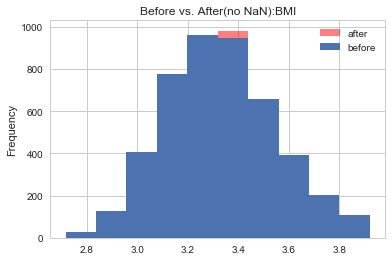

In [36]:
get_NaN_ratio(df,'BMI')
fill_NaN(df,'BMI','mean')
df['BMI'].describe()

### Fasting glucose has the second highest % of missing data

#### 
The fasting plasma glucose test (FPG) is the preferred method of screening for diabetes. The FPG measures a person's blood sugar level after fasting or not eating anything for at least 8 hours.

The global mean fasting plasma blood glucose level in humans is about 5.5 mmol/L (100 mg/dL); however, this level fluctuates throughout the day.
FPG test results:
normal: less than 5.6 mmol/L
prediabetes: 5.6 ~ 6.9 mmol/L
diabetes: 7 mmol/L or higher (on two separate tests)


The NaN ratio in fasting_glucose is 0.001
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4640.000000
mean        1.741000
std         0.174103
min         0.157004
25%         1.641324
50%         1.713798
75%         1.800224
max         2.502419
Name: fasting_glucose, dtype: float64

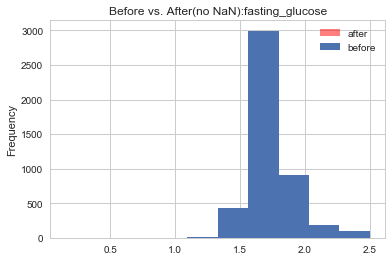

In [37]:
get_NaN_ratio(df,'fasting_glucose')
df = fill_NaN(df,'fasting_glucose','mean')
df['fasting_glucose'].describe()

### HDL


The NaN ratio in HDL is 0.000
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


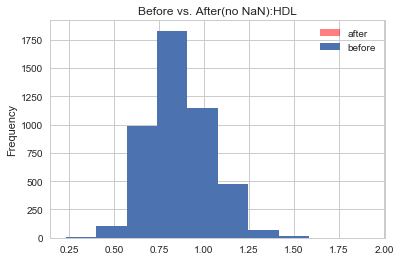

In [38]:
# Check for NaN 
get_NaN_ratio(df,'HDL')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'HDL','mean')


### Insulin


The NaN ratio in insulin is 0.012
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


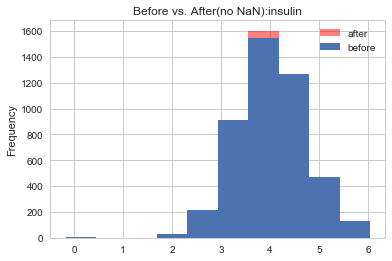

In [39]:
# Check for NaN 
get_NaN_ratio(df,'insulin')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'insulin','mean')


### Blood Pressure

####
High blood pressure, or hypertension, is a condition that’s seen in people with type 2 diabetes. It’s unknown why there’s such a significant relationship between the two diseases. It’s believed that the following contribute to both conditions:

obesity
a diet high in fat and sodium
chronic inflammation
inactivity
The combination of high blood pressure and type 2 diabetes is particularly lethal and can significantly raise your risk of having a heart attack or stroke.


The NaN ratio in sysBP is 0.056
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

The NaN ratio in diaBP is 0.056
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


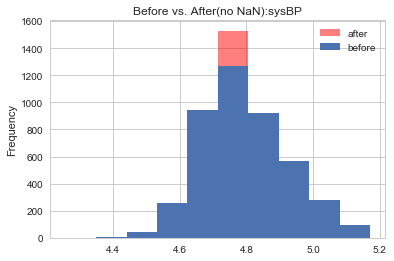

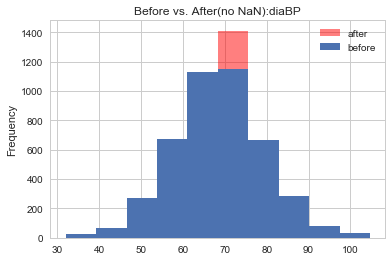

In [40]:
# Check for NaN in sysBP and diaBP
get_NaN_ratio(df,'sysBP')
get_NaN_ratio(df,'diaBP')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'sysBP','mean')
df = fill_NaN(df,'diaBP','mean')

### LDL 

####
cholesterol (mg/dL) - values: 23 to 277
LDL stands for low-density lipoproteins. It is sometimes called the "bad" cholesterol because a high LDL level leads to a buildup of cholesterol in your arteries. This extra LDL, along with other substances, forms plaque.
Diabetes tends to lower HDL levels and raise triglyceride and LDL levels, which increases the risk for heart disease and stroke.


The NaN ratio in LDL is 0.045
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    0
2.833058    207
2.664000     69
2.948000     65
2.845000     60
2.379000     60
           ... 
5.534000      1
5.172000      1
0.879000      1
1.060000      1
5.405000      1
Name: LDL, Length: 189, dtype: int64


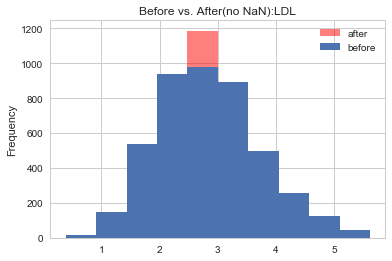

In [41]:
# Check for NaN 
get_NaN_ratio(df,'LDL')
df = fill_NaN(df,'LDL','mean')
get_value_count(df,'LDL')

### Diabetes

In [42]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['diabetes'] == 2,['diabetes']] = 0
df['diabetes'].value_counts()
df = process_cstr(df,feature='diabetes',method='drop',cstr=[7,9])

In [43]:
get_NaN_ratio(df,'diabetes')
df['diabetes'].value_counts()


The NaN ratio in diabetes is 0.000
No missing values detected


0.0    4034
1.0     480
3.0     124
Name: diabetes, dtype: int64

In [44]:
db_counts = df['diabetes'].value_counts().to_dict()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_pre_db = db_counts[3.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_pre_db*100,'% people are pre diabetes')
print(percentage_no_db*100,'% people do not have diabetes')


10.34928848641656 % people have diabetes
2.673566192324278 % people are pre diabetes
86.97714532125916 % people do not have diabetes


In [45]:
df = df[df['diabetes'] != 3.0]
df['diabetes'].value_counts()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_no_db*100,'% people do not have diabetes')
print('Baseline accuracy',percentage_no_db*100)


10.633584404076208 % people have diabetes
89.36641559592378 % people do not have diabetes
Baseline accuracy 89.36641559592378


In [46]:
#Final NaN check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4639
Data columns (total 25 columns):
BMI                    4514 non-null float64
HDL                    4514 non-null float64
LDL                    4514 non-null float64
age                    4514 non-null float64
alc_days_year          3484 non-null float64
diabetes               4514 non-null float64
fasting_glucose        4514 non-null float64
gender                 4514 non-null float64
insulin                4514 non-null float64
race                   4514 non-null float64
sugar                  495 non-null float64
sysBP                  4514 non-null float64
diaBP                  4514 non-null float64
BMI_NaN                4514 non-null uint8
fasting_glucose_NaN    4514 non-null uint8
gender_NaN             4514 non-null uint8
LDL_NaN                4514 non-null uint8
HDL_NaN                4514 non-null uint8
insulin_NaN            4514 non-null uint8
age_NaN                4514 non-null uint8
race_NaN

In [47]:
#Drop Sugar and alc_days_year since they have a high % of missing values 
df.drop(['sugar', 'alc_days_year'], axis=1, inplace = True)


### One Hot Encoding

In [48]:
#Race
df['race'] = pd.Categorical(df['race'])
dfDummies = pd.get_dummies(df['race'], prefix = 'race')
df = pd.concat([df, dfDummies], axis=1)

#Gender
df['gender'] = pd.Categorical(df['gender'])
dfDummies = pd.get_dummies(df['gender'], prefix = 'gender')
df = pd.concat([df, dfDummies], axis=1)

df.drop(['race', 'gender'], axis=1, inplace = True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4639
Data columns (total 29 columns):
BMI                    4514 non-null float64
HDL                    4514 non-null float64
LDL                    4514 non-null float64
age                    4514 non-null float64
diabetes               4514 non-null float64
fasting_glucose        4514 non-null float64
insulin                4514 non-null float64
sysBP                  4514 non-null float64
diaBP                  4514 non-null float64
BMI_NaN                4514 non-null uint8
fasting_glucose_NaN    4514 non-null uint8
gender_NaN             4514 non-null uint8
LDL_NaN                4514 non-null uint8
HDL_NaN                4514 non-null uint8
insulin_NaN            4514 non-null uint8
age_NaN                4514 non-null uint8
race_NaN               4514 non-null uint8
sugar_NaN              4514 non-null uint8
sysBP_NaN              4514 non-null uint8
diaBP_NaN              4514 non-null uint8
alc_days_year_N

### Test-Train Split

In [49]:
X = df.loc[:, df.columns != 'diabetes']
y = df.loc[:, df.columns == 'diabetes']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = pd.DataFrame(X_train)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
X=os_data_X
y=os_data_y['diabetes']
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print(X)
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['diabetes']==0]))
print("Number of subscription",len(os_data_y[os_data_y['diabetes']==1]))
print("Proportion of data with no diabetes in oversampled data is ",len(os_data_y[os_data_y['diabetes']==0])/len(os_data_X))
print("Proportion of data with diabetes in oversampled data is ",len(os_data_y[os_data_y['diabetes']==1])/len(os_data_X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

print(len(X_train),len(X_val),len(X_test))


length of oversampled data is  5652
           BMI       HDL       LDL        age  fasting_glucose   insulin  \
0     3.222868  0.936093  2.224000  50.000000         1.662599  3.948162   
1     3.161247  0.947789  2.534000  30.000000         1.630612  4.009875   
2     3.693867  0.985817  2.974000  45.000000         1.733424  4.542230   
3     3.261935  0.896088  2.664000  75.000000         1.752672  4.674883   
4     3.280911  0.737164  3.129000  66.000000         1.630612  4.672081   
...        ...       ...       ...        ...              ...       ...   
5647  3.213061  0.877689  2.496944  74.043169         1.932781  2.564493   
5648  3.343085  0.911710  3.051000  55.000000         1.866969  4.167946   
5649  3.459215  0.960403  2.842233  52.622900         1.915659  4.693116   
5650  3.536024  0.738365  3.850024  57.728581         1.775689  4.735636   
5651  3.764109  0.739519  3.313227  41.430819         2.115090  4.996172   

         sysBP      diaBP  BMI_NaN  fasting_glucose

In [50]:
#print(len(df))
#print(len(X))
#print(y_train)
y_counts = y_test.value_counts().to_dict()
percentage_yes_y = y_counts[1.0]/y_test.shape[0]
percentage_no_y = y_counts[0.0]/y_test.shape[0]
print(percentage_yes_y*100,'% people have diabetes')
print(percentage_no_y*100,'% people do not have diabetes')

51.00235849056604 % people have diabetes
48.99764150943396 % people do not have diabetes


In [51]:
#scaling of numerical features
df_new = df.copy()
df_new["BMI"] = (df["BMI"] - df["BMI"].mean())/df["BMI"].std()
df_new["HDL"] = (df["HDL"] - df["HDL"].mean())/df["HDL"].std()
df_new["LDL"] = (df["LDL"] - df["LDL"].mean())/df["LDL"].std()
df_new["age"] = (df["age"] - df["age"].mean())/df["age"].std()
df_new["fasting_glucose"] = (df["fasting_glucose"] - df["fasting_glucose"].mean())/df["fasting_glucose"].std()

In [52]:
X_scaled = df_new.loc[:, df_new.columns != 'diabetes']
y = df_new.loc[:, df_new.columns == 'diabetes']

os = SMOTE(random_state=0)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
X_scaled_train = pd.DataFrame(X_scaled_train)
columns = X_scaled.columns
os_data_X,os_data_y=os.fit_sample(X_scaled_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
X_scaled=os_data_X
y=os_data_y['diabetes']
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print(X_scaled)
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['diabetes']==0]))
print("Number of subscription",len(os_data_y[os_data_y['diabetes']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==1])/len(os_data_X))
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
X_scaled_train, X_scaled_val, y_train, y_val  = train_test_split(X_scaled_train, y_train, test_size=0.2, random_state=1) 

print(len(X_scaled_train),len(X_scaled_val),len(X_scaled_test))



length of oversampled data is  5652
           BMI       HDL       LDL       age  fasting_glucose   insulin  \
0    -0.477474  0.388358 -0.710402  0.137894        -0.436147  3.948162   
1    -0.760924  0.456667 -0.348290 -0.955087        -0.619707  4.009875   
2     1.689066  0.678764  0.165676 -0.135351        -0.029718  4.542230   
3    -0.297769  0.154709 -0.196437  1.504120         0.080738  4.674883   
4    -0.210482 -0.773475  0.346732  1.012279        -0.619707  4.672081   
...        ...       ...       ...       ...              ...       ...   
5647  0.506925 -0.743073 -0.776730  1.772647         3.791734  4.976857   
5648  0.402738  0.447963  0.363827  1.022538         0.615855  4.189415   
5649  0.322805  0.623638 -0.505937  0.689724         0.988605  5.071880   
5650  0.293689 -0.872580  0.594074  1.077865         2.321506  4.090117   
5651  1.031569 -1.280881  0.561928  0.034912         2.864041  4.589667   

         sysBP      diaBP  BMI_NaN  fasting_glucose_NaN  ...  d

# Feature selection

In [57]:
df.head()

,BMI,HDL,LDL,age,diabetes,fasting_glucose,insulin,sysBP,diaBP,BMI_NaN,...,diaBP_NaN,alc_days_year_NaN,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_1.0,gender_2.0
0,3.363842,0.936093,1.448,72.0,1.0,2.371458,3.554776,4.955827,82.000000,0,...,0,0,0,0,1,0,0,0,1,0
1,2.980619,1.163151,2.612,73.0,0.0,1.781709,3.603322,4.922411,86.666667,0,...,0,0,0,0,1,0,0,0,0,1
2,3.575151,0.916291,2.508,61.0,0.0,1.809272,4.493792,4.809471,80.666667,0,...,0,0,0,0,1,0,0,0,0,1
3,3.010621,1.247032,1.733,26.0,0.0,1.597365,3.139833,4.650781,62.666667,0,...,0,0,0,0,1,0,0,0,0,1
4,3.126761,0.862890,1.940,33.0,0.0,1.539659,3.591818,4.798542,62.000000,0,...,0,1,0,0,0,0,1,0,0,1


### numerical features:['BMI', 'HDL','LDL','age','fasting_glucose','insulin','sysBP','diaBP']
### catogorical features: ['BMI_NaN','fasting_glucose_NaN','gender_NaN','LDL_NaN','HDL_NaN','insulin_NaN','age_NaN','race_NaN','sugar_NaN','sysBP_NaN','diaBP_NaN','alc_days_year_NaN','race_1.0','race_2.0','race_3.0','race_4.0','race_6.0','race_7.0','gender_1.0','gender_2.0'"]]

##  Statistical-based feature selection
    -Pearson correlations( for numerical features)
    -hypothesis testing
    -chi2 test

In [59]:
columnscorr1=['BMI', 'HDL','LDL','age','fasting_glucose','insulin','sysBP','diaBP',"diabetes"]
df[columnscorr1].corr()['diabetes']

BMI                0.147411
HDL               -0.110907
LDL               -0.126151
age                0.280643
fasting_glucose    0.512967
insulin            0.128789
sysBP              0.163416
diaBP              0.014991
diabetes           1.000000
Name: diabetes, dtype: float64

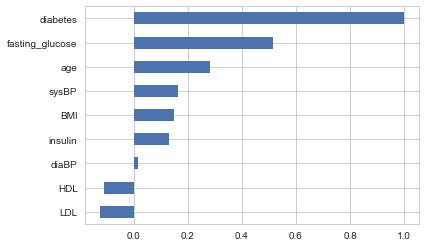

In [61]:
df[columnscorr1].corr()['diabetes'].sort_values(ascending=True).plot(kind='barh')
plt.show()

In [60]:
df[columnscorr1].corr()['diabetes'].abs()>.2

BMI                False
HDL                False
LDL                False
age                 True
fasting_glucose     True
insulin            False
sysBP              False
diaBP              False
diabetes            True
Name: diabetes, dtype: bool

In [76]:
highly_correlated_features =df.columns[df.corr()['diabetes'].abs() > .1]
highly_correlated_features = highly_correlated_features.drop('diabetes')
highly_correlated_features

Index(['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'sysBP'], dtype='object')

In [107]:
X_subsettedcorr = X_train[highly_correlated_features]

## Feature selection using hypothesis testing

In [79]:
# SelectKBest selects features according to the k highest scores of a given scoring function
from sklearn.feature_selection import SelectKBest
# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif
# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests

In [80]:
# keep only the best five features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=5)

In [103]:
# matrix after selecting the top 5 features
k_best.fit_transform(X_train, y_train)

array([[ 3.43075618,  4.008     , 50.        ,  1.65211419,  4.84680832],
       [ 3.68672319,  2.35330667, 67.3336796 ,  2.16755558,  4.85152589],
       [ 3.31781577,  3.569     , 31.        ,  1.60943791,  4.61841541],
       ...,
       [ 3.23867845,  2.586     , 47.        ,  1.7722368 ,  4.82028157],
       [ 3.53514535,  2.831764  , 35.        ,  2.23857976,  4.94639303],
       [ 3.03974916,  2.56      , 31.        ,  1.7722368 ,  4.76501889]])

In [104]:
# get the p values of columns
k_best.pvalues_
# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values = pd.DataFrame({'column': X_train.columns, 'p_value':
k_best.pvalues_}).sort_values('p_value')
# show the top 5 features
p_values.head(10)

,column,p_value
4,fasting_glucose,3.203295e-316
3,age,1.674060e-178
2,LDL,5.818351e-56
6,sysBP,3.827380e-45
0,BMI,9.029100e-41
5,insulin,5.371675e-25
1,HDL,1.634147e-15
22,race_3.0,4.345195e-07
20,race_1.0,6.496469e-06
23,race_4.0,8.166377e-04


## Chi2 test

In [114]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(10,'Score'))

           Features        Score
3               age  4313.137761
2               LDL    49.685652
4   fasting_glucose    32.767553
5           insulin    16.428689
20         race_1.0     7.175033
23         race_4.0     5.979324
8           BMI_NaN     5.189137
1               HDL     4.997961
7             diaBP     4.570309
24         race_6.0     4.420158


In [105]:
#Backward Elimination
import statsmodels.api as sm
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0', 'race_7.0', 'gender_1.0', 'gender_2.0']


In [124]:
columnspvalue=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0', 'race_7.0', 'gender_1.0', 'gender_2.0']
X_subsettedpvalue = X_train[columnspvalue]
X_subsettedpvalue

,BMI,HDL,LDL,age,fasting_glucose,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_1.0,gender_2.0
2703,3.430756,0.806476,4.008000,50.00000,1.652114,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,1.000000
3574,3.686723,0.795391,2.353307,67.33368,2.167556,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000
827,3.317816,0.862890,3.569000,31.00000,1.609438,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000
1447,3.889777,0.875469,2.612000,63.00000,1.682688,0.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
1029,3.608212,0.862890,3.465000,48.00000,1.713978,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,3.327706,1.159947,1.641310,80.00000,1.319840,0.0,0.0,0.0,0.989765,0.010235,0.0,0.010235,0.989765
256,3.000720,0.966984,1.267000,26.00000,1.515567,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000
2776,3.238678,0.783902,2.586000,47.00000,1.772237,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000
2594,3.535145,0.862890,2.831764,35.00000,2.238580,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000


## Tree-based model feature selection metrics
When fitting decision trees, the tree starts at the root node and greedily chooses the optimal
split at every junction that optimizes a certain metric of node purity. By default, scikit-learn
optimizes for the gini metric at every step. While each split is created, the model keeps
track of how much each split helps the overall optimization goal. In doing so, tree-based
models that choose splits based on such metrics have a notion of feature importance.


## decision tree

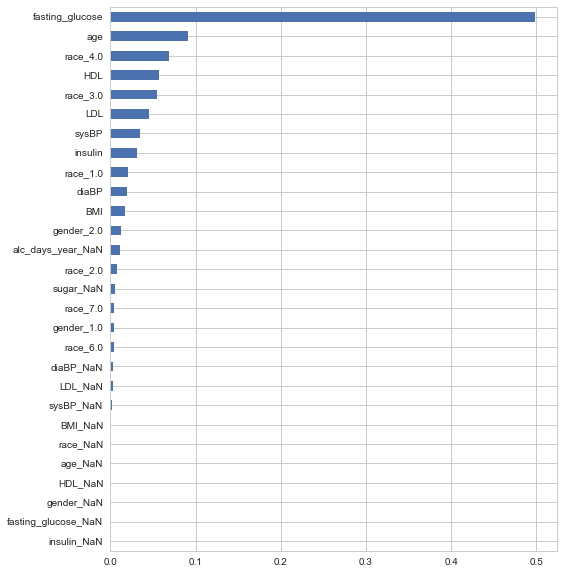

In [96]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
feat_importances1 = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [97]:
columnstree=["fasting_glucose","age","diaBP","LDL","BMI","insulin","race_3.0","race_1.0","race_4.0","sysBP"]
X_subsettedtree = X_train[columnstree]
X_subsettedtree

,fasting_glucose,age,diaBP,LDL,BMI,insulin,race_3.0,race_1.0,race_4.0,sysBP
2093,1.733777,26.000000,71.333333,2.896000,3.910021,4.760121,1.000000,0.000000,0.0,4.753590
2273,1.827287,80.000000,82.666667,2.146000,3.299534,3.335058,1.000000,0.000000,0.0,5.159055
5553,2.258919,65.000000,53.931589,1.836526,3.474481,4.120418,0.000000,0.000000,0.0,4.817011
3186,1.869367,71.680201,74.680201,2.588021,3.584211,4.150114,0.000000,1.000000,0.0,4.920287
505,1.662599,41.000000,63.333333,2.483000,3.261935,4.107261,0.000000,1.000000,0.0,4.611815
...,...,...,...,...,...,...,...,...,...,...
1574,1.619586,46.000000,80.666667,3.310000,3.517498,5.530143,0.000000,1.000000,0.0,4.922411
307,1.585145,39.000000,73.333333,2.043000,3.292126,4.247066,0.000000,0.000000,0.0,4.742029
3828,1.889376,75.290277,59.806482,1.959777,3.512104,4.482747,0.354861,0.645139,0.0,4.998557
3117,1.713798,42.000000,65.333333,2.833058,3.540959,5.052545,0.000000,1.000000,0.0,4.747826


## Random Forest

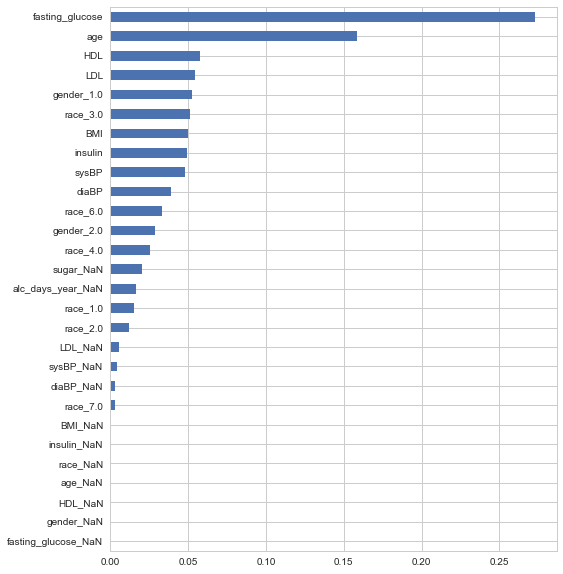

In [98]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
feat_importances2 = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_importances2.sort_values(ascending=True).plot(kind='barh')
plt.show()

## Extra Trees

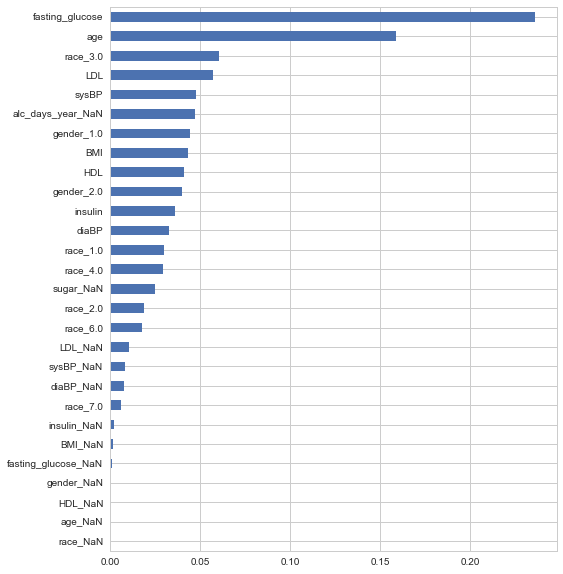

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(X_train,y_train)
feat_importances3 = pd.Series(et.feature_importances_, index=X_train.columns)
feat_importances3.sort_values(ascending=True).plot(kind='barh')
plt.show()

## Gradient Boosting

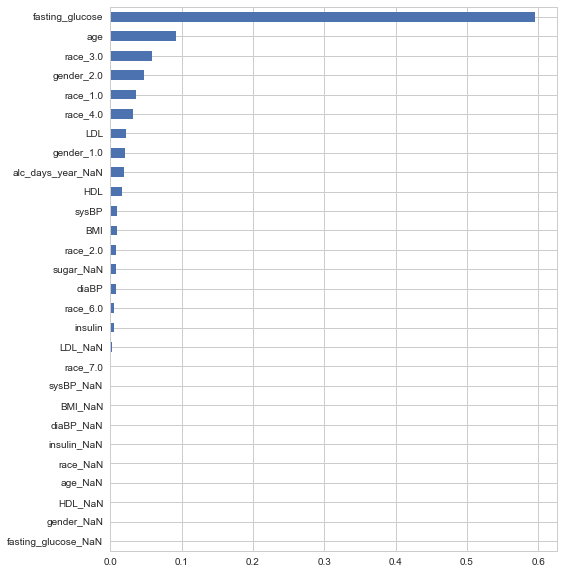

In [100]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train,y_train)
feat_importances4 = pd.Series(gbr.feature_importances_, index=X.columns)
feat_importances4.sort_values(ascending=True).plot(kind='barh')
plt.show()

## Linear models and regularization
* L1 regularization, also known as lasso regularization, uses the L1 Norm, which,using the above formula, reduces to the sum of the absolute values of the entriesof a vector to limit the coefficients in such a way that they may disappear entirely and become 0. If the coefficient of a feature drops to 0, then that feature will not have any say in the prediction of new data observations and definitely will not be chosen by a SelectFromModel selector.
* L2 regularization, also known as ridge regularization, imposes the L2 norm as apenalty (sum of the square of vector entries) so that coefficients cannot drop to 0, but they can become very, very tiny

## Logistic Regression

In [110]:
from sklearn.feature_selection import SelectFromModel
# a new selector that uses the coefficients from a regularized logistic regression as feature importances
logistic_selector = SelectFromModel(LogisticRegression())
# make a new pipeline that uses coefficients from LogistisRegression as a feature ranker
regularization_pipe = Pipeline([('select', logistic_selector), ('classifier', tree)])
regularization_pipe_params= {'select__threshold': [0.01, 0.05, 0.1,'mean', 'median', '2.*mean'], 'classifier__max_depth': [1, 3, 5, 7],'select__estimator__penalty': ['l1', 'l2']}
# set the optimal params to the pipeline
regularization_pipe.set_params(**{'select__threshold': 0.01, 'classifier__max_depth': 5, 'select__estimator__penalty': 'l1'})
# fit our pipeline to our data
regularization_pipe.steps[0][1].fit(X_train, y_train)
# list the columns that the Logisti Regression selected by calling the get_support() method from SelectFromModel
X_train.columns[regularization_pipe.steps[0][1].get_support()]

Index(['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'sysBP',
       'diaBP', 'BMI_NaN', 'LDL_NaN', 'insulin_NaN', 'sugar_NaN',
       'alc_days_year_NaN', 'race_1.0', 'race_3.0', 'race_4.0', 'race_7.0',
       'gender_1.0'],
      dtype='object')

In [111]:
columns=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'sysBP',
       'diaBP', 'BMI_NaN', 'LDL_NaN', 'insulin_NaN', 'sugar_NaN',
       'alc_days_year_NaN', 'race_1.0', 'race_3.0', 'race_4.0', 'race_7.0',
       'gender_1.0']
X_subsettedlogl1 = X_train[columns]
X_subsettedlogl1

,BMI,HDL,LDL,age,fasting_glucose,insulin,sysBP,diaBP,BMI_NaN,LDL_NaN,insulin_NaN,sugar_NaN,alc_days_year_NaN,race_1.0,race_3.0,race_4.0,race_7.0,gender_1.0
2703,3.430756,0.806476,4.008000,50.00000,1.652114,4.235844,4.846808,81.333333,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000
3574,3.686723,0.795391,2.353307,67.33368,2.167556,5.780459,4.851526,64.667359,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,1.000000
827,3.317816,0.862890,3.569000,31.00000,1.609438,3.797285,4.618415,60.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.000000
1447,3.889777,0.875469,2.612000,63.00000,1.682688,5.550398,4.897840,71.333333,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,1.000000
1029,3.608212,0.862890,3.465000,48.00000,1.713978,5.027689,5.010635,80.000000,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,3.327706,1.159947,1.641310,80.00000,1.319840,4.494586,5.053162,64.013647,0.0,0.010235,0.0,1.0,0.0,0.0,0.0,0.989765,0.0,0.010235
256,3.000720,0.966984,1.267000,26.00000,1.515567,3.854818,4.759321,63.333333,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000
2776,3.238678,0.783902,2.586000,47.00000,1.772237,3.717467,4.820282,64.666667,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000
2594,3.535145,0.862890,2.831764,35.00000,2.238580,5.929483,4.946393,96.000000,0.0,1.000000,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,1.000000


## SVM

In [112]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())
svc_pipe = Pipeline([('select', svc_selector),('classifier', tree)])
svc_pipe_params ={ 'select__estimator__loss': ['squared_hinge','hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median','2.*mean'], 'select__estimator__penalty': ['l1', 'l2'],'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True,False]}
# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge','select__threshold': 0.01,'select__estimator__penalty': 'l1','classifier__max_depth': 5,'select__estimator__dual': False})
# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X_train, y_train)
# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X_train.columns[svc_pipe.steps[0][1].get_support()]

Index(['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'sysBP', 'BMI_NaN',
       'insulin_NaN', 'sugar_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_2.0',
       'race_3.0', 'race_4.0', 'race_6.0', 'race_7.0', 'gender_1.0',
       'gender_2.0'],
      dtype='object')

In [113]:
columns=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'sysBP', 'BMI_NaN',
       'insulin_NaN', 'sugar_NaN', 'alc_days_year_NaN', 'race_1.0', 'race_2.0',
       'race_3.0', 'race_4.0', 'race_6.0', 'race_7.0', 'gender_1.0',
       'gender_2.0']
X_subsettedSVMl1 = X_train[columns]
X_subsettedSVMl1

,BMI,HDL,LDL,age,fasting_glucose,sysBP,BMI_NaN,insulin_NaN,sugar_NaN,alc_days_year_NaN,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_1.0,gender_2.0
2703,3.430756,0.806476,4.008000,50.00000,1.652114,4.846808,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,1.000000
3574,3.686723,0.795391,2.353307,67.33368,2.167556,4.851526,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000
827,3.317816,0.862890,3.569000,31.00000,1.609438,4.618415,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000
1447,3.889777,0.875469,2.612000,63.00000,1.682688,4.897840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000
1029,3.608212,0.862890,3.465000,48.00000,1.713978,5.010635,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,3.327706,1.159947,1.641310,80.00000,1.319840,5.053162,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.989765,0.010235,0.0,0.010235,0.989765
256,3.000720,0.966984,1.267000,26.00000,1.515567,4.759321,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000
2776,3.238678,0.783902,2.586000,47.00000,1.772237,4.820282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000
2594,3.535145,0.862890,2.831764,35.00000,2.238580,4.946393,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000


## Variance Inflation Factor

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [114]:
calculate_vif_(X_train)

dropping 'sysBP_NaN' at index: 17
dropping 'race_1.0' at index: 19
dropping 'gender_1.0' at index: 24
dropping 'sysBP' at index: 6
dropping 'BMI' at index: 0
dropping 'fasting_glucose' at index: 3
dropping 'diaBP' at index: 4
dropping 'HDL' at index: 0
dropping 'insulin' at index: 2
dropping 'sugar_NaN' at index: 10
dropping 'LDL' at index: 0
Remaining variables:
Index(['age', 'BMI_NaN', 'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN',
       'HDL_NaN', 'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN',
       'alc_days_year_NaN', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0',
       'race_7.0', 'gender_2.0'],
      dtype='object')


,age,BMI_NaN,fasting_glucose_NaN,gender_NaN,LDL_NaN,HDL_NaN,insulin_NaN,age_NaN,race_NaN,diaBP_NaN,alc_days_year_NaN,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_2.0
2703,50.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
3574,67.33368,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000
827,31.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,1.000000
1447,63.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000
1029,48.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,80.00000,0.0,0.0,0.0,0.010235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989765,0.010235,0.0,0.989765
256,26.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.000000
2776,47.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000
2594,35.00000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000


In [130]:
columnsvif=['age', 'BMI_NaN', 'fasting_glucose_NaN', 'gender_NaN', 'LDL_NaN',
       'HDL_NaN', 'insulin_NaN', 'age_NaN', 'race_NaN', 'diaBP_NaN',
       'alc_days_year_NaN', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0',
       'race_7.0', 'gender_2.0']
X_subsettedVIF = X_train[columnsvif]
X_subsettedVIF

,age,BMI_NaN,fasting_glucose_NaN,gender_NaN,LDL_NaN,HDL_NaN,insulin_NaN,age_NaN,race_NaN,diaBP_NaN,alc_days_year_NaN,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_2.0
2703,50.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.0,1.000000
3574,67.33368,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000
827,31.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,1.000000
1447,63.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000
1029,48.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,80.00000,0.0,0.0,0.0,0.010235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989765,0.010235,0.0,0.989765
256,26.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.000000
2776,47.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000
2594,35.00000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000


## Embedded Method-Lasso and Ridge

In [116]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coefLasso = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.004180
Best score using built-in LassoCV: 0.499519


In [117]:
print("Lasso picked " + str(sum(coefLasso != 0)) + " variables and eliminated the other " +  str(sum(coefLasso == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 18 variables


Text(0.5,1,'Feature importance using Lasso Model')

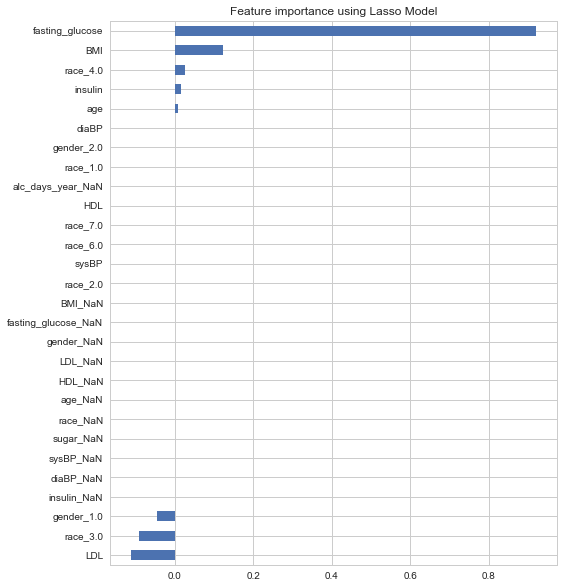

In [118]:
imp_coefLasso = coefLasso.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefLasso.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [119]:
coefLasso

BMI                    1.226437e-01
HDL                   -0.000000e+00
LDL                   -1.127537e-01
age                    8.517131e-03
fasting_glucose        9.214923e-01
insulin                1.683924e-02
sysBP                 -0.000000e+00
diaBP                  8.250165e-04
BMI_NaN               -0.000000e+00
fasting_glucose_NaN    0.000000e+00
gender_NaN             0.000000e+00
LDL_NaN                0.000000e+00
HDL_NaN                0.000000e+00
insulin_NaN            0.000000e+00
age_NaN                0.000000e+00
race_NaN               0.000000e+00
sugar_NaN             -0.000000e+00
sysBP_NaN              0.000000e+00
diaBP_NaN              0.000000e+00
alc_days_year_NaN      0.000000e+00
race_1.0               0.000000e+00
race_2.0              -0.000000e+00
race_3.0              -9.110803e-02
race_4.0               2.661756e-02
race_6.0              -0.000000e+00
race_7.0              -0.000000e+00
gender_1.0            -4.452602e-02
gender_2.0             2.561

In [128]:
columnsLasso=['age',"LDL" ,'BMI',"fasting_glucose","insulin" ,"diaBP", 'race_3.0', 'race_4.0', 'gender_1.0','gender_2.0']
X_subsettedLasso = X_train[columnsLasso]
X_subsettedLasso

,age,LDL,BMI,fasting_glucose,insulin,diaBP,race_3.0,race_4.0,gender_1.0,gender_2.0
2703,50.00000,4.008000,3.430756,1.652114,4.235844,81.333333,1.0,0.000000,0.000000,1.000000
3574,67.33368,2.353307,3.686723,2.167556,5.780459,64.667359,1.0,0.000000,1.000000,0.000000
827,31.00000,3.569000,3.317816,1.609438,3.797285,60.000000,0.0,0.000000,0.000000,1.000000
1447,63.00000,2.612000,3.889777,1.682688,5.550398,71.333333,0.0,1.000000,1.000000,0.000000
1029,48.00000,3.465000,3.608212,1.713978,5.027689,80.000000,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
3501,80.00000,1.641310,3.327706,1.319840,4.494586,64.013647,0.0,0.989765,0.010235,0.989765
256,26.00000,1.267000,3.000720,1.515567,3.854818,63.333333,0.0,1.000000,0.000000,1.000000
2776,47.00000,2.586000,3.238678,1.772237,3.717467,64.666667,0.0,0.000000,1.000000,0.000000
2594,35.00000,2.831764,3.535145,2.238580,5.929483,96.000000,1.0,0.000000,1.000000,0.000000


In [70]:
from sklearn.linear_model import RidgeCV
Rg = RidgeCV()
Rg.fit(X_train, y_train)
print("Best alpha using built-in RidgeCV: %f" % Rg.alpha_)
print("Best score using built-in RidgeCV: %f" % Rg.score(X_train,y_train))
coefRidge = pd.Series(Rg.coef_, index = X_train.columns)

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: 0.505345


In [72]:
print("Ridge picked " + str(sum(coefRidge != 0)) + " variables and eliminated the other " +  str(sum(coefRidge == 0)) + " variables")

Ridge picked 24 variables and eliminated the other 4 variables


Text(0.5,1,'Feature importance using Ridge Model')

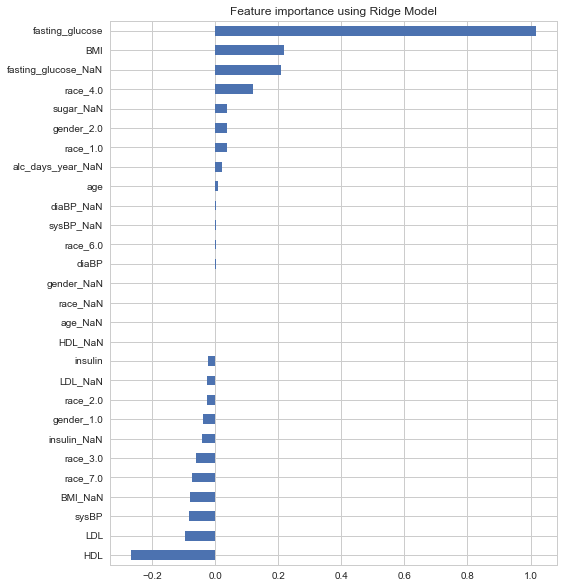

In [73]:
imp_coefRidge = coefRidge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefRidge.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [74]:
coefRidge

BMI                    0.219123
HDL                   -0.267688
LDL                   -0.096876
age                    0.008342
fasting_glucose        1.018744
insulin               -0.021666
sysBP                 -0.083352
diaBP                  0.002165
BMI_NaN               -0.078164
fasting_glucose_NaN    0.209003
gender_NaN             0.000000
LDL_NaN               -0.024722
HDL_NaN                0.000000
insulin_NaN           -0.042204
age_NaN                0.000000
race_NaN               0.000000
sugar_NaN              0.037977
sysBP_NaN              0.003976
diaBP_NaN              0.003976
alc_days_year_NaN      0.021094
race_1.0               0.036790
race_2.0              -0.024822
race_3.0              -0.060278
race_4.0               0.119051
race_6.0               0.002983
race_7.0              -0.073723
gender_1.0            -0.037164
gender_2.0             0.037164
dtype: float64

In [77]:
columnsRidge=['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'insulin', 'sysBP',
       'diaBP', 'BMI_NaN', 'LDL_NaN', 'insulin_NaN', 'sugar_NaN',
       'alc_days_year_NaN', 'race_1.0','race_2.0' ,'race_3.0', 'race_4.0','race_6.0', 'race_7.0',
       'gender_1.0','gender_2.0']
X_subsettedRidge = X_train[columnsRidge]
X_subsettedRidge

,BMI,HDL,LDL,age,fasting_glucose,insulin,sysBP,diaBP,BMI_NaN,LDL_NaN,...,sugar_NaN,alc_days_year_NaN,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0,race_7.0,gender_1.0,gender_2.0
2093,3.910021,0.698135,2.896000,26.000000,1.733777,4.760121,4.753590,71.333333,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000
2273,3.299534,0.722706,2.146000,80.000000,1.827287,3.335058,5.159055,82.666667,0.0,0.0,...,1.0,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000
5553,3.474481,0.750911,1.836526,65.000000,2.258919,4.120418,4.817011,53.931589,0.0,0.0,...,1.0,0.299128,0.000000,0.700872,0.000000,0.0,0.299128,0.0,1.000000,0.000000
3186,3.584211,1.056260,2.588021,71.680201,1.869367,4.150114,4.920287,74.680201,0.0,0.0,...,1.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000
505,3.261935,0.875469,2.483000,41.000000,1.662599,4.107261,4.611815,63.333333,0.0,0.0,...,1.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,3.517498,0.722706,3.310000,46.000000,1.619586,5.530143,4.922411,80.666667,0.0,0.0,...,1.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
307,3.292126,0.850151,2.043000,39.000000,1.585145,4.247066,4.742029,73.333333,0.0,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000
3828,3.512104,0.909058,1.959777,75.290277,1.889376,4.482747,4.998557,59.806482,0.0,0.0,...,1.0,0.645139,0.645139,0.000000,0.354861,0.0,0.000000,0.0,0.354861,0.645139
3117,3.540959,0.737164,2.833058,42.000000,1.713798,5.052545,4.747826,65.333333,0.0,1.0,...,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000


In [101]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
xScaled=minmax.fit_transform(X_train)

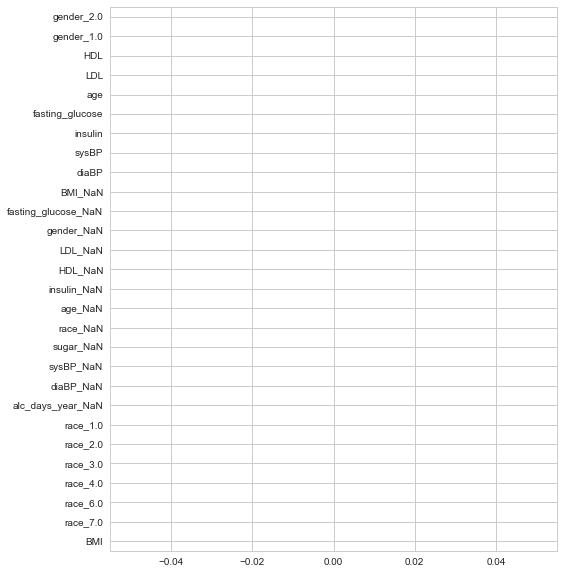

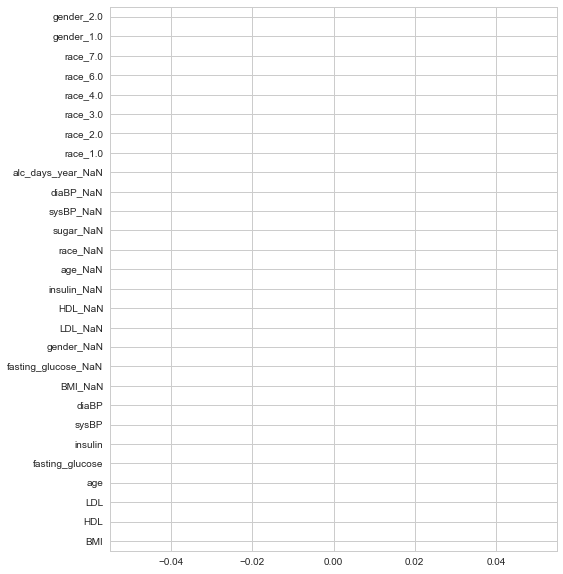

In [102]:
lasso=Lasso()
lasso.fit(xScaled,y_train)
lassocoeff = pd.Series((lasso.coef_), index=X_train.columns)
lassocoeff.sort_values(ascending=True).plot(kind='barh')
plt.show()
normLasso = lassocoeff/np.linalg.norm(lassocoeff)
normLasso = pd.Series(abs(normLasso), index=X_train.columns)
normLasso.sort_values(ascending=True).plot(kind='barh')
plt.show()

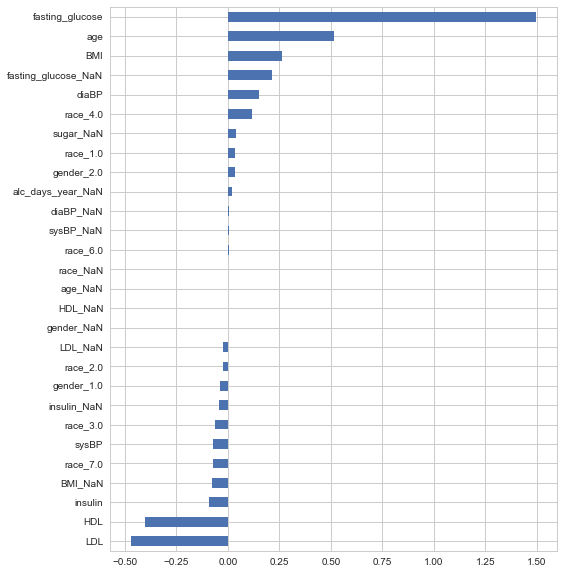

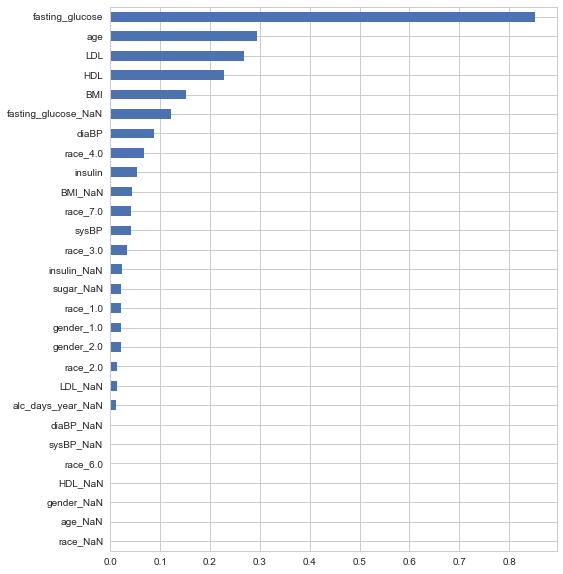

In [103]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(xScaled,y_train)
Ridgecoeff = pd.Series((ridge.coef_), index=X_train.columns)
Ridgecoeff.sort_values(ascending=True).plot(kind='barh')
plt.show()
normRidge = Ridgecoeff/np.linalg.norm(Ridgecoeff)
normRidge = pd.Series(abs(normRidge), index=X_train.columns)
normRidge.sort_values(ascending=True).plot(kind='barh')
plt.show()

## Mixed Method

In [109]:
weight1= np.random.randint(1,10)/10
weight2= np.random.randint(1,10)/10
weight3= np.random.randint(1,10)/10
weight4= np.random.randint(1,10)/10
weight5= np.random.randint(1,10)/10
weight6= np.random.randint(1,10)/10
weightSum=weight1+weight2+weight3+weight4+weight6

In [110]:
feat=(weight1*feat_importances1+weight2*feat_importances2+weight3*feat_importances3+weight4*feat_importances4+weight6*normRidge)/(weightSum)

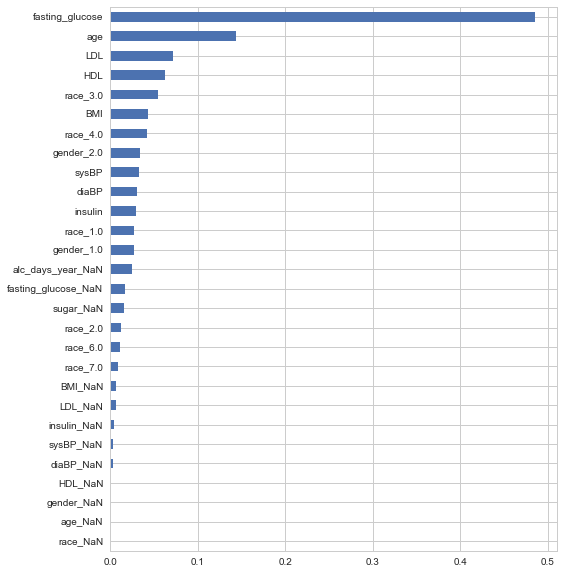

In [111]:
feat.sort_values(ascending=True).plot(kind='barh')
plt.show()

# Modelling

### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train.shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train, y_train)

rf_predictions_train = rf_final.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val)
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

#y_test = pd.Series(y_test)
#rf_predictions_test = pd.Series(rf_predictions_test)
#rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
#print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

print ("Average Time to Fit (s):{}".format(round(rf_random.cv_results_['mean_fit_time'].mean(), 3)))
# the average time it took a model to predict out of sample data (in seconds)
# this metric gives us insight into how this model will perform in real-time analysis
print ("Average Time to Score (s):{}".format(round(rf_random.cv_results_['mean_score_time'].mean(), 3)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


The best accuracy of 0.9229789942711648 from cross validation is given by 86 estimators 4 max features 10 max_depth 30 min samples split 10 min samples leaf True bootstrap parameters
The Training set accuracy of the cross-validated random forest model is 0.9462126034373011
The Validation set accuracy of the cross-validated random forest model is 0.9173027989821882
The Test set accuracy of the cross-validated random forest model is 0.9239904988123515
The precision is 0.9406060606060606 recall is 0.9076023391812865 fscore is 0.9238095238095237
Average Time to Fit (s):0.632
Average Time to Score (s):0.021


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train[columnspvalue].shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train[columnspvalue], y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train[columnspvalue], y_train)

rf_predictions_train = rf_final.predict(X_train[columnspvalue])
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val[columnspvalue])
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test[columnspvalue])
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

#y_test = pd.Series(y_test)
#rf_predictions_test = pd.Series(rf_predictions_test)
#rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
#print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

print ("Average Time to Fit (s):{}".format(round(rf_random.cv_results_['mean_fit_time'].mean(), 3)))
# the average time it took a model to predict out of sample data (in seconds)
# this metric gives us insight into how this model will perform in real-time analysis
print ("Average Time to Score (s):{}".format(round(rf_random.cv_results_['mean_score_time'].mean(), 3)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


The best accuracy of 0.9210693825588797 from cross validation is given by 66 estimators 2 max features 50 max_depth 20 min samples split 10 min samples leaf True bootstrap parameters
The Training set accuracy of the cross-validated random forest model is 0.9455760661998727
The Validation set accuracy of the cross-validated random forest model is 0.9223918575063613
The Test set accuracy of the cross-validated random forest model is 0.9245843230403801
The precision is 0.9449877750611247 recall is 0.904093567251462 fscore is 0.9240884638374178
Average Time to Fit (s):0.441
Average Time to Score (s):0.017


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train[columnstree].shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train[columnstree], y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train[columnstree], y_train)

rf_predictions_train = rf_final.predict(X_train[columnstree])
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val[columnstree])
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test[columnstree])
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

#y_test = pd.Series(y_test)
#rf_predictions_test = pd.Series(rf_predictions_test)
#rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
#print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

print ("Average Time to Fit (s):{}".format(round(rf_random.cv_results_['mean_fit_time'].mean(), 3)))
# the average time it took a model to predict out of sample data (in seconds)
# this metric gives us insight into how this model will perform in real-time analysis
print ("Average Time to Score (s):{}".format(round(rf_random.cv_results_['mean_score_time'].mean(), 3)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


The best accuracy of 0.9048376830044558 from cross validation is given by 82 estimators 2 max features 41 max_depth 10 min samples split 10 min samples leaf True bootstrap parameters
The Training set accuracy of the cross-validated random forest model is 0.9404837683004456
The Validation set accuracy of the cross-validated random forest model is 0.9096692111959288
The Test set accuracy of the cross-validated random forest model is 0.9156769596199525
The precision is 0.9290012033694344 recall is 0.9029239766081871 fscore is 0.9157769869513642
Average Time to Fit (s):0.441
Average Time to Score (s):0.018


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train[columnsvif].shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train[columnsvif], y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train[columnsvif], y_train)

rf_predictions_train = rf_final.predict(X_train[columnsvif])
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val[columnsvif])
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test[columnsvif])
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

#y_test = pd.Series(y_test)
#rf_predictions_test = pd.Series(rf_predictions_test)
#rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
#print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

print ("Average Time to Fit (s):{}".format(round(rf_random.cv_results_['mean_fit_time'].mean(), 3)))
# the average time it took a model to predict out of sample data (in seconds)
# this metric gives us insight into how this model will perform in real-time analysis
print ("Average Time to Score (s):{}".format(round(rf_random.cv_results_['mean_score_time'].mean(), 3)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   53.4s finished


The best accuracy of 0.8784213876511776 from cross validation is given by 47 estimators 9 max features 45 max_depth 40 min samples split 10 min samples leaf True bootstrap parameters
The Training set accuracy of the cross-validated random forest model is 0.9057924888605984
The Validation set accuracy of the cross-validated random forest model is 0.8893129770992366
The Test set accuracy of the cross-validated random forest model is 0.8770783847980997
The precision is 0.9308510638297872 recall is 0.8187134502923976 fscore is 0.8711885500933416
Average Time to Fit (s):0.348
Average Time to Score (s):0.021


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 50)]
# Number of features to consider at every split
max_features = list(range(1,X_train[columnsLasso].shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40,50] 
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train[columnsLasso], y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  True , random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train[columnsLasso], y_train)

rf_predictions_train = rf_final.predict(X_train[columnsLasso])
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val[columnsLasso])
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test[columnsLasso])
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

#y_test = pd.Series(y_test)
#rf_predictions_test = pd.Series(rf_predictions_test)
#rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
#print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

print ("Average Time to Fit (s):{}".format(round(rf_random.cv_results_['mean_fit_time'].mean(), 3)))
# the average time it took a model to predict out of sample data (in seconds)
# this metric gives us insight into how this model will perform in real-time analysis
print ("Average Time to Score (s):{}".format(round(rf_random.cv_results_['mean_score_time'].mean(), 3)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.0s finished


The best accuracy of 0.9159770846594526 from cross validation is given by 60 estimators 2 max features 41 max_depth 20 min samples split 10 min samples leaf True bootstrap parameters
The Training set accuracy of the cross-validated random forest model is 0.942711648631445
The Validation set accuracy of the cross-validated random forest model is 0.9147582697201018
The Test set accuracy of the cross-validated random forest model is 0.9228028503562945
The precision is 0.9393939393939394 recall is 0.9064327485380117 fscore is 0.9226190476190477
Average Time to Fit (s):0.409
Average Time to Score (s):0.018


### Random Forest on Scaled Numerical Features

### Logistic Regression

20 features are chosen through RFE and they are ['BMI', 'HDL', 'LDL', 'age', 'fasting_glucose', 'sysBP', 'BMI_NaN', 'LDL_NaN', 'HDL_NaN', 'insulin_NaN', 'sugar_NaN', 'sysBP_NaN', 'diaBP_NaN', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0', 'race_7.0', 'gender_1.0', 'gender_2.0']
The Training set accuracy of the Logistic Regression model is 0.8488224061107574
The Validation set accuracy of the Logistic Regression model is 0.8460559796437659
Test set accuracy of the Logistic Regression model is 0.8432304038004751
col_0     0.0  1.0
diabetes          
0.0       706  123
1.0       141  714
The precision is 0.8530465949820788 recall is 0.8350877192982457 fscore is 0.8439716312056738


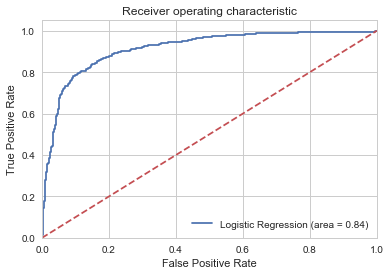

In [65]:
#Logistic regression with Recursive Feature Elimination
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)
chosen_vars = []
for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
        chosen_vars.append(X_train.columns[i])
print(len(chosen_vars), "features are chosen through RFE and they are", chosen_vars)
X_lr_train = X_train[chosen_vars]  
X_lr_test = X_test[chosen_vars]
X_lr_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_lr_train, y_train)
logreg_train = logreg.predict(X_lr_train)
logreg_accuracy_train = accuracy_score(y_train, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_lr_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_lr_test)
log_accuracy_test = accuracy_score(y_test, log_pred_test)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
logreg_confusion = pd.crosstab(y_test, log_pred_test)
print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_lr_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_lr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### kNN 

#### kNN is performed on scaled numerical features

In [66]:
#kNN grid search for choice of best cluster size
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled_train, y_train)
k = grid.best_params_["n_neighbors"]
print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled_train, y_train)
knn_pred_train = knn.predict(X_scaled_train)
knn_accuracy_train = accuracy_score(y_train, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val)
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test)
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
knn_confusion = pd.crosstab(y_test, knn_pred_test)
print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         


The best accuracy of 0.9312539783577339 is given by 2 clusters
The Training set accuracy of the kNN model is 0.998408656906429
The Validation set accuracy of the kNN model is 0.9440203562340967
Test set accuracy of the kNN model is 0.9542755344418052
col_0     0.0  1.0
diabetes          
0.0       763   66
1.0        11  844
The precision is 0.9274725274725275 recall is 0.9871345029239766 fscore is 0.9563739376770539


### Lasso CV

In [67]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index=X.columns))
coeff = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff) 
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print("training score:", train_score ) 
print ("test score: ", test_score)
print(lassocv.alpha_)

BMI                    1.998065e-01
HDL                   -1.073758e-01
LDL                   -1.138899e-01
age                    7.931896e-03
fasting_glucose        9.825007e-01
insulin                0.000000e+00
sysBP                 -0.000000e+00
diaBP                  1.686422e-04
BMI_NaN               -2.567653e-02
fasting_glucose_NaN    0.000000e+00
gender_NaN             0.000000e+00
LDL_NaN                0.000000e+00
HDL_NaN                5.995178e-02
insulin_NaN            6.835089e-02
age_NaN                0.000000e+00
race_NaN               0.000000e+00
sugar_NaN             -6.685526e-03
sysBP_NaN              0.000000e+00
diaBP_NaN              0.000000e+00
alc_days_year_NaN      0.000000e+00
race_1.0               1.375004e-02
race_2.0              -2.014149e-02
race_3.0              -9.553505e-02
race_4.0               5.248248e-02
race_6.0               0.000000e+00
race_7.0              -0.000000e+00
gender_1.0            -6.311773e-02
gender_2.0             3.056

### Lasso and LR

In [68]:
C = [1.4154569084153052e-05,50,10, 1, .1, .001]

#LassoCV + LR model fitting on the training set
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    coeff = np.sum(clf.coef_!=0)
    print('Number of coeff:', coeff)

    print('Training accuracy:  {0:.3f}'.format(clf.score(X_train, y_train)))
    print('Test accuracy:  {0:.3f}'.format(clf.score(X_test, y_test)))
    print('')

    
clf = LogisticRegression(penalty='l1', C=10, solver='liblinear')
clf.fit(X_train, y_train)
ls_pred_train = clf.predict(X_train)
ls_accuracy_train = accuracy_score(y_train, ls_pred_train)
print("The Training set accuracy of the Lasso CV for LR model is  {0:.3f}".format(ls_accuracy_train))

# LassoCV + LR Model performance on the Validation set
ls_pred_val = clf.predict(X_val)
ls_accuracy_val = accuracy_score(y_val, ls_pred_val)
print("The Validation set accuracy of the Lasso CV for LR model is {0:.3f}".format(ls_accuracy_val))

#LassoCV + LR Model performance on the Test set
ls_pred_test = clf.predict(X_test)
ls_accuracy_test = accuracy_score(y_test, ls_pred_test)
print('Test set accuracy of the Lasso CV for LR model is  {0:.3f}'.format(ls_accuracy_test ))


#Confusion Matrix and other metrics (Precision, Recall and Fscore)
ls_confusion_test = pd.crosstab(y_test, ls_pred_test)
print(ls_confusion_test)
precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
ls_other_metrics = precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
print("The precision is  {0:.3f}".format(ls_other_metrics[0]) , "recall is {0:.3f} ".format(ls_other_metrics[1]), "fscore is {0:.3f}".format(ls_other_metrics[2]))         


C: 1.4154569084153052e-05
Coefficient of each feature: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Number of coeff: 0
Training accuracy:  0.505
Test accuracy:  0.492

C: 50
Coefficient of each feature: [[ 1.566702   -1.39838564 -0.88484808  0.06212965  7.66913296 -0.13568685
  -0.67717232  0.0120868  -0.83952498 -0.01881944  0.          0.26576296
   5.34937712  0.7588679   0.          0.         -0.25388109 -0.0095147
  -0.03361615  0.07394389 -5.3776419  -5.73252453 -6.47658618 -5.1616107
  -5.66794379 -6.03916993 -6.1538428  -5.49027344]]
Number of coeff: 25
Training accuracy:  0.850
Test accuracy:  0.850

C: 10
Coefficient of each feature: [[ 1.52763537 -1.40832111 -0.88481576  0.06241906  7.63915919 -0.13082401
  -0.78065536  0.01243055 -0.81025082  0.          0.          0.26208565
   0.66542615  0.75415557  0.          0.         -0.2522613  -0.01045063
  -0.03044898  0.07195802  0.07097313 -0.28043916 -1.02674706  0.29038195
  -0.2

### Gradient Boosting

In [69]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=25, max_depth=5, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=25, max_depth=5, random_state=0)
gb_clf.fit(X_train, y_train)   
gb_pred_test = gb_clf.predict(X_test)
    
gb_confusion_test = pd.crosstab(y_test, gb_pred_test)
print(gb_confusion_test)
precision_recall_fscore_support(y_test, gb_pred_test, average='binary')
gb_other_metrics = precision_recall_fscore_support(y_test, gb_pred_test, average='binary')
print("The precision is  {0:.3f}".format(gb_other_metrics[0]) , "recall is {0:.3f} ".format(gb_other_metrics[1]), "fscore is {0:.3f}".format(gb_other_metrics[2]))         


Learning rate:  0.05
Accuracy score (training): 0.934
Accuracy score (validation): 0.912
Accuracy score (test): 0.909
Learning rate:  0.075
Accuracy score (training): 0.941
Accuracy score (validation): 0.907
Accuracy score (test): 0.917
Learning rate:  0.1
Accuracy score (training): 0.948
Accuracy score (validation): 0.910
Accuracy score (test): 0.923
Learning rate:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.933
Accuracy score (test): 0.939
Learning rate:  0.5
Accuracy score (training): 0.993
Accuracy score (validation): 0.949
Accuracy score (test): 0.940
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (validation): 0.945
Accuracy score (test): 0.931
Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.936
Accuracy score (test): 0.928
col_0     0.0  1.0
diabetes          
0.0       793   36
1.0        65  790
The precision is  0.956 recall is 0.924  fscore is 0.940


### Bootstrapping on the test set

####Need to complete####

In [70]:
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap, random_state=42, criterion= 'gini')   
rf_model = rf_final.fit(X_train, y_train)

boot = pd.merge(y_test, X_test, left_index=True, right_index=True)
boot.rename(columns = {'Actual':'diabetes'}, inplace = True) 

boot1 = resample(boot, replace=True, n_samples=500, random_state=1)
boot2 = resample(boot,  replace=True, n_samples=500, random_state=3)
boot3 = resample(boot, replace=True, n_samples=500, random_state=5)
boot4 = resample(boot,replace=True, n_samples=500, random_state=8)
boot5 = resample(boot,replace=True, n_samples=500, random_state=9)
boot6 = resample(boot, replace=True, n_samples=500, random_state=11)
boot7 = resample(boot, replace=True, n_samples=500, random_state=13)
boot8 = resample(boot,replace=True, n_samples=500, random_state=15)
boot9 = resample(boot,replace=True, n_samples=500, random_state=17)
boot10 = resample(boot, replace=True, n_samples=500, random_state=19)

boot1_test_y = boot1.loc[:, boot1.columns == 'diabetes']
boot1_test_X = boot1.loc[:, boot1.columns != 'diabetes']

rf_predictions_boot1 = rf_final.predict(boot1_test_X)
rf_accuracy_boot1 = accuracy_score(boot1_test_y, rf_predictions_boot1)
print("The Test set accuracy of the cross-validated random forest model on boot1 is", rf_accuracy_boot1)

boot2_test_y = boot2.loc[:, boot2.columns == 'diabetes']
boot2_test_X = boot2.loc[:, boot2.columns != 'diabetes']
rf_predictions_boot2 = rf_final.predict(boot2_test_X)
rf_accuracy_boot2 = accuracy_score(boot2_test_y, rf_predictions_boot2)
print("The Test set accuracy of the cross-validated random forest model on boot2 is", rf_accuracy_boot2)

boot3_test_y = boot3.loc[:, boot3.columns == 'diabetes']
boot3_test_X = boot3.loc[:, boot3.columns != 'diabetes']
rf_predictions_boot3 = rf_final.predict(boot3_test_X)
rf_accuracy_boot3 = accuracy_score(boot3_test_y, rf_predictions_boot3)
print("The Test set accuracy of the cross-validated random forest model on boot3 is", rf_accuracy_boot3)


boot4_test_y = boot4.loc[:, boot4.columns == 'diabetes']
boot4_test_X = boot4.loc[:, boot4.columns != 'diabetes']
rf_predictions_boot4 = rf_final.predict(boot4_test_X)
rf_accuracy_boot4 = accuracy_score(boot4_test_y, rf_predictions_boot4)
print("The Test set accuracy of the cross-validated random forest model on boot4 is", rf_accuracy_boot4)


boot5_test_y = boot5.loc[:, boot5.columns == 'diabetes']
boot5_test_X = boot5.loc[:, boot5.columns != 'diabetes']
rf_predictions_boot5 = rf_final.predict(boot5_test_X)
rf_accuracy_boot5 = accuracy_score(boot5_test_y, rf_predictions_boot5)
print("The Test set accuracy of the cross-validated random forest model on boot5 is", rf_accuracy_boot5)


boot6_test_y = boot6.loc[:, boot6.columns == 'diabetes']
boot6_test_X = boot6.loc[:, boot6.columns != 'diabetes']
rf_predictions_boot6 = rf_final.predict(boot6_test_X)
rf_accuracy_boot6 = accuracy_score(boot6_test_y, rf_predictions_boot6)
print("The Test set accuracy of the cross-validated random forest model on boot5 is", rf_accuracy_boot6)


boot7_test_y = boot7.loc[:, boot7.columns == 'diabetes']
boot7_test_X = boot7.loc[:, boot7.columns != 'diabetes']
rf_predictions_boot7 = rf_final.predict(boot7_test_X)
rf_accuracy_boot7 = accuracy_score(boot7_test_y, rf_predictions_boot7)
print("The Test set accuracy of the cross-validated random forest model on boot7 is", rf_accuracy_boot7)


boot8_test_y = boot8.loc[:, boot8.columns == 'diabetes']
boot8_test_X = boot8.loc[:, boot8.columns != 'diabetes']
rf_predictions_boot8 = rf_final.predict(boot8_test_X)
rf_accuracy_boot8 = accuracy_score(boot8_test_y, rf_predictions_boot8)
print("The Test set accuracy of the cross-validated random forest model on boot8 is", rf_accuracy_boot8)


boot9_test_y = boot9.loc[:, boot9.columns == 'diabetes']
boot9_test_X = boot9.loc[:, boot9.columns != 'diabetes']
rf_predictions_boot9 = rf_final.predict(boot9_test_X)
rf_accuracy_boot9 = accuracy_score(boot9_test_y, rf_predictions_boot9)
print("The Test set accuracy of the cross-validated random forest model on boot9 is", rf_accuracy_boot9)


boot10_test_y = boot10.loc[:, boot10.columns == 'diabetes']
boot10_test_X = boot10.loc[:, boot10.columns != 'diabetes']
rf_predictions_boot10 = rf_final.predict(boot10_test_X)
rf_accuracy_boot10 = accuracy_score(boot10_test_y, rf_predictions_boot10)
print("The Test set accuracy of the cross-validated random forest model on boot10 is", rf_accuracy_boot10)




The Test set accuracy of the cross-validated random forest model on boot1 is 0.926
The Test set accuracy of the cross-validated random forest model on boot2 is 0.938
The Test set accuracy of the cross-validated random forest model on boot3 is 0.92
The Test set accuracy of the cross-validated random forest model on boot4 is 0.934
The Test set accuracy of the cross-validated random forest model on boot5 is 0.904
The Test set accuracy of the cross-validated random forest model on boot5 is 0.936
The Test set accuracy of the cross-validated random forest model on boot7 is 0.926
The Test set accuracy of the cross-validated random forest model on boot8 is 0.938
The Test set accuracy of the cross-validated random forest model on boot9 is 0.896
The Test set accuracy of the cross-validated random forest model on boot10 is 0.93


In [71]:
boot = pd.merge(y_test, X_test, left_index=True, right_index=True)
boot.rename(columns = {'Actual':'diabetes'}, inplace = True) 
n_iterations = 100
stats = list()
for i in range(n_iterations):
    boot = resample(boot, replace=True, n_samples=500,random_state=15 )
    boot_test_y = boot.loc[:, boot.columns == 'diabetes']
    boot_test_X = boot.loc[:, boot.columns != 'diabetes']    
    rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap, random_state=42, criterion= 'gini')   
    rf_model = rf_final.fit(X_train, y_train)
    rf_predictions_boot = rf_final.predict(boot_test_X)
    score = accuracy_score(boot_test_y, rf_predictions_boot)
    stats.append(score)
    

95.00 confidence interval 93.17% and 100.00%


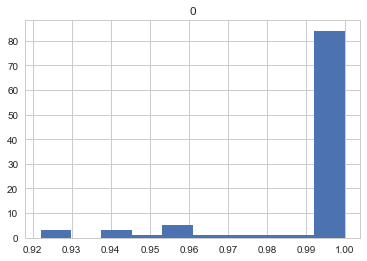

In [72]:
hist = pd.DataFrame(stats).hist()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.2f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))
